In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras

In [ ]:
path = 'D:/PlantVillage/archive/plantvillage dataset/color'
train_ds , test_ds = keras.utils.image_dataset_from_directory(
    path ,
    image_size=(224,224),
    batch_size=32 ,
    seed = 123 ,
    validation_split=.2,
    subset='both'
)

Found 54305 files belonging to 38 classes.
Using 43444 files for training.
Using 10861 files for validation.


In [ ]:
classes = train_ds.class_names
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

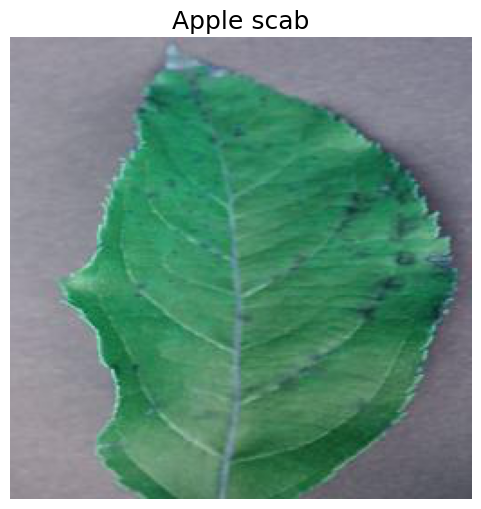

In [ ]:
image = cv2.imread("D:/PlantVillage/archive/plantvillage dataset/color/Apple___Apple_scab/0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Apple scab',size =18 )
plt.axis('off')
plt.show()

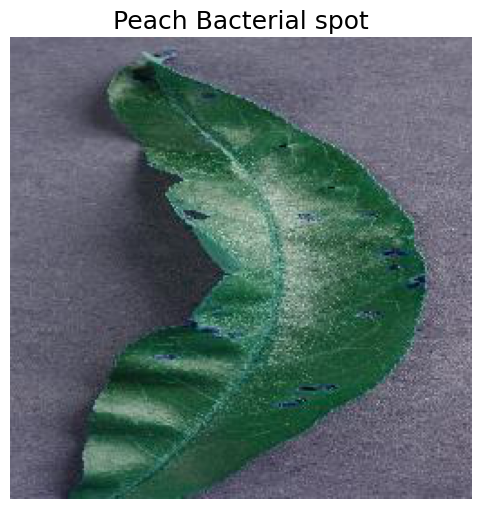

In [ ]:
image = cv2.imread("D:/PlantVillage/archive/plantvillage dataset/color/Peach___Bacterial_spot/00e6ad4a-5a62-48d7-ac68-9c0b8ec87f5f___Rut._Bact.S 1472.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Peach Bacterial spot',size =18 )
plt.axis('off')
plt.show()

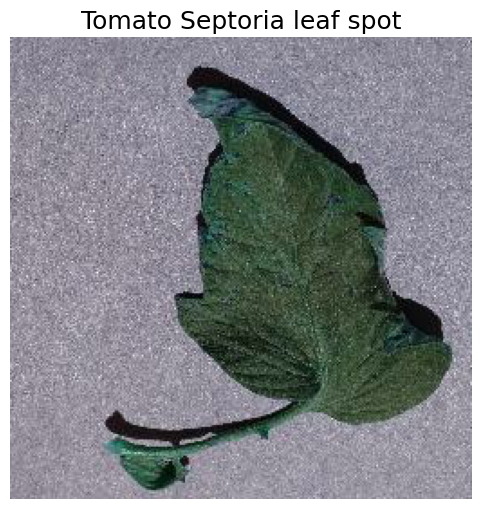

In [ ]:
image = cv2.imread("D:/PlantVillage/archive/plantvillage dataset/color/Tomato___Septoria_leaf_spot/015c2613-fb1c-4f31-88f1-c7e5be9ddc97___JR_Sept.L.S 8431.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Tomato Septoria leaf spot',size =18 )
plt.axis('off')
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Rescaling(scale = 1/255 , input_shape =(224,224,3) ) ,

    keras.layers.Conv2D(32 , (3,3) , activation = 'relu'),
    keras.layers.MaxPool2D((2,2))                     ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,

    # fully connected layers

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(38,activation ='sigmoid')

])

In [ ]:
model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

In [ ]:
history = model.fit(train_ds , epochs = 20)

Epoch 1/20


1358/1358 [==============================] - 882s 646ms/step - loss: 1.6580 - accuracy: 0.5324
Epoch 2/20
1358/1358 [==============================] - 905s 666ms/step - loss: 0.6057 - accuracy: 0.8088
Epoch 3/20
1358/1358 [==============================] - 929s 684ms/step - loss: 0.3859 - accuracy: 0.8751
Epoch 4/20
1358/1358 [==============================] - 838s 617ms/step - loss: 0.2957 - accuracy: 0.9015
Epoch 5/20
1358/1358 [==============================] - 828s 610ms/step - loss: 0.2353 - accuracy: 0.9233
Epoch 6/20
1358/1358 [==============================] - 825s 607ms/step - loss: 0.1996 - accuracy: 0.9335
Epoch 7/20
1358/1358 [==============================] - 827s 609ms/step - loss: 0.1755 - accuracy: 0.9406
Epoch 8/20
1358/1358 [==============================] - 837s 616ms/step - loss: 0.1491 - accuracy: 0.9495
Epoch 9/20
1358/1358 [==============================] - 873s 643ms/step - loss: 0.1457 - accuracy: 0.9513
Epoch 10/20
1358/1358 [=====================

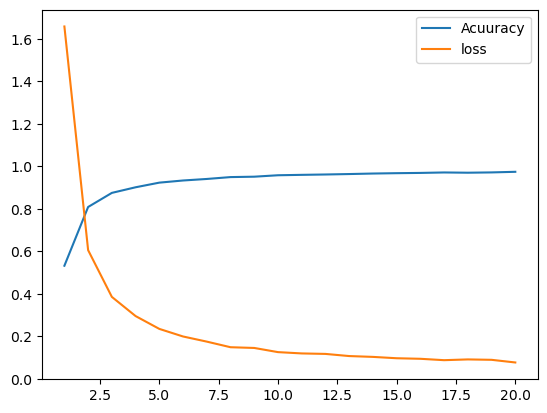

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1,21)

plt.plot(epochs , accuracy , label = 'Acuuracy')
plt.plot(epochs , loss , label = 'loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_ds)

340/340 [==============================] - 46s 132ms/step - loss: 0.2585 - accuracy: 0.9271


[0.2584938108921051, 0.9270785450935364]

In [ ]:
def img_to_pred(image):
  image = image.numpy()
  image = tf.expand_dims(image,0)
  return image

1/1 [==============================] - 0s 47ms/step


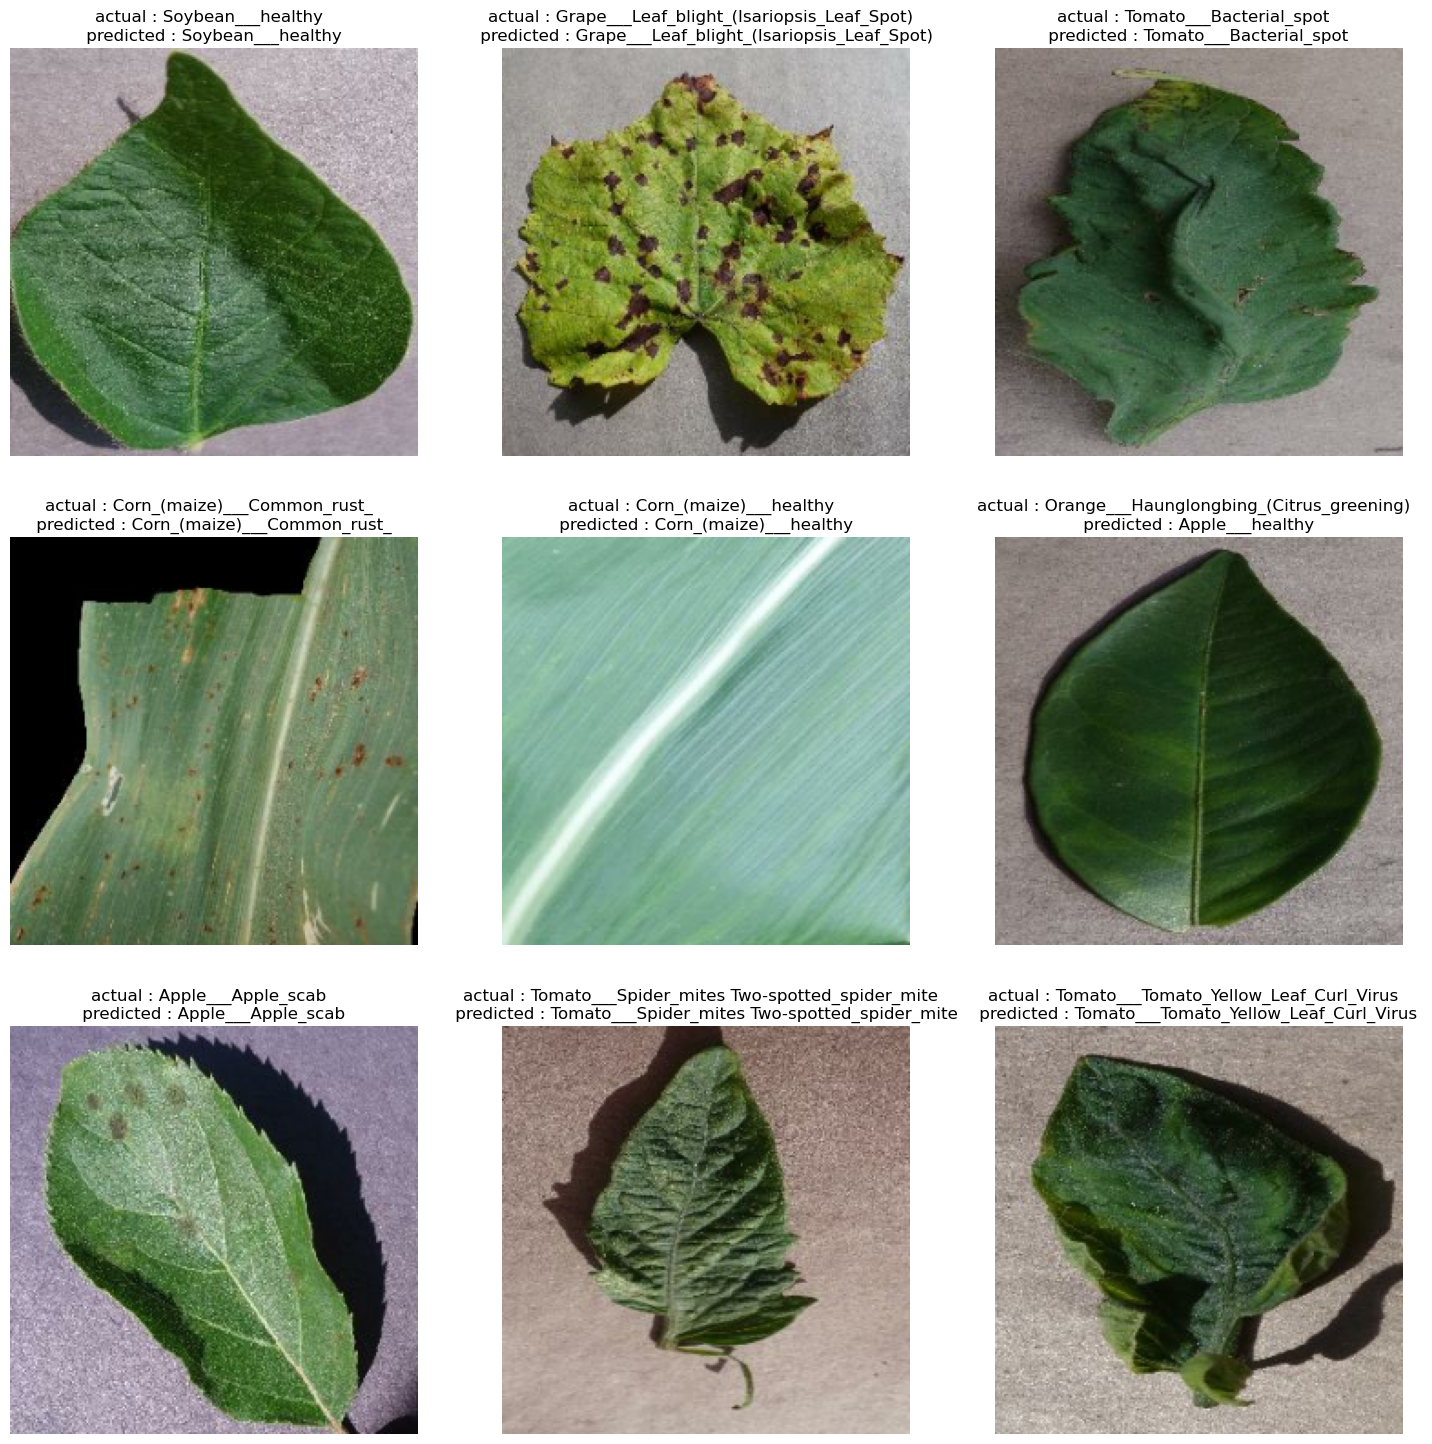

In [ ]:
plt.figure(figsize=(18,18))
for images, labels in test_ds.take(1) : # take the first patch
  for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(images[i].numpy().astype('uint32'))
    plt.axis('off')
    actual = classes[labels[i]]
    predict =classes[np.argmax( model.predict(img_to_pred(images[i])))]
    plt.title(f"actual : {actual}  \n predicted : {predict} ")

In [ ]:
model.save("my_model4.h5")

C:\Users\Pratik\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
